In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate a simulated dataset of e-commerce sales data
np.random.seed(42)

# Simulate raw data for 500 orders
data = {
    'order_id': np.arange(1, 501),
    'customer_id': np.random.randint(1, 100, 500),
    'product_id': np.random.randint(1, 50, 500),
    'quantity': np.random.randint(1, 5, 500),
    'unit_price': np.round(np.random.uniform(10, 500, 500), 2),
    'order_date': [datetime.today() - timedelta(days=np.random.randint(0, 30)) for _ in range(500)]
}

# Create a DataFrame
raw_data = pd.DataFrame(data)

# Calculate the total amount for each order (quantity * unit_price)
raw_data['total_amount'] = raw_data['quantity'] * raw_data['unit_price']

# Display the first few rows of the raw data
raw_data.head()


,order_id,customer_id,product_id,quantity,unit_price,order_date,total_amount
0,1,52,37,4,174.57,2024-09-10 04:02:09.707441,698.28
1,2,93,22,2,414.30,2024-09-06 04:02:09.707504,828.60
2,3,15,29,4,187.90,2024-09-19 04:02:09.707520,751.60
3,4,72,14,2,26.77,2024-09-19 04:02:09.707531,53.54
4,5,61,28,3,417.02,2024-09-28 04:02:09.707542,1251.06


In [2]:
# Extract raw sales data (already generated above)
def extract_data():
    return raw_data

# Extracted raw data
sales_data = extract_data()
sales_data.head()


,order_id,customer_id,product_id,quantity,unit_price,order_date,total_amount
0,1,52,37,4,174.57,2024-09-10 04:02:09.707441,698.28
1,2,93,22,2,414.30,2024-09-06 04:02:09.707504,828.60
2,3,15,29,4,187.90,2024-09-19 04:02:09.707520,751.60
3,4,72,14,2,26.77,2024-09-19 04:02:09.707531,53.54
4,5,61,28,3,417.02,2024-09-28 04:02:09.707542,1251.06


In [3]:
# Transformation function to clean and aggregate the data
def transform_data(df):
    # Drop any duplicate records if needed
    df = df.drop_duplicates()

    # Aggregate data by customer to analyze their purchase history
    customer_summary = df.groupby('customer_id').agg(
        total_orders=('order_id', 'count'),
        total_quantity=('quantity', 'sum'),
        total_spent=('total_amount', 'sum'),
        avg_order_value=('total_amount', 'mean')
    ).reset_index()

    # Aggregate data by product to analyze product sales
    product_summary = df.groupby('product_id').agg(
        total_sold=('quantity', 'sum'),
        total_revenue=('total_amount', 'sum'),
        avg_unit_price=('unit_price', 'mean')
    ).reset_index()

    return customer_summary, product_summary

# Apply transformations
customer_summary, product_summary = transform_data(sales_data)

# Display transformed data
print("Customer Summary:")
print(customer_summary.head())

print("\nProduct Summary:")
print(product_summary.head())


Customer Summary:
   customer_id  total_orders  total_quantity  total_spent  avg_order_value
0            1             9              21      5761.29       640.143333
1            2            10              24      7665.72       766.572000
2            3             7              19      4787.62       683.945714
3            4             5              12      3607.48       721.496000
4            5             3               6      1647.76       549.253333

Product Summary:
   product_id  total_sold  total_revenue  avg_unit_price
0           1          29       10902.89      343.173333
1           2          20        2654.21      123.261429
2           3          24        4838.03      220.427000
3           4          20        5071.21      249.957500
4           5          36        7638.76      203.159375


In [4]:
# Loading function (In a real scenario, this would load data into a database)
def load_data_to_db(customer_summary, product_summary):
    # Simulate loading by writing to CSV or storing in-memory
    customer_summary.to_csv('customer_summary.csv', index=False)
    product_summary.to_csv('product_summary.csv', index=False)

# Load the data into a "data warehouse"
load_data_to_db(customer_summary, product_summary)


In [5]:
# Top 5 customers by total spending
top_customers = customer_summary.nlargest(5, 'total_spent')
print("Top 5 Customers by Total Spending:")
print(top_customers)


Top 5 Customers by Total Spending:
    customer_id  total_orders  total_quantity  total_spent  avg_order_value
60           62            14              41      8812.77       629.483571
95           97             8              23      7697.85       962.231250
1             2            10              24      7665.72       766.572000
46           48             9              23      6056.91       672.990000
61           63             8              20      5906.67       738.333750


In [6]:
# Top 5 products by total revenue
top_products = product_summary.nlargest(5, 'total_revenue')
print("\nTop 5 Products by Total Revenue:")
print(top_products)



Top 5 Products by Total Revenue:
    product_id  total_sold  total_revenue  avg_unit_price
46          47          45       13100.15      272.565882
25          26          46       12084.22      283.941875
11          12          36       11379.61      307.855385
0            1          29       10902.89      343.173333
48          49          36       10208.23      298.338667


<ipython-input-7-9fdaf96fe1c7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='total_revenue', data=top_products, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

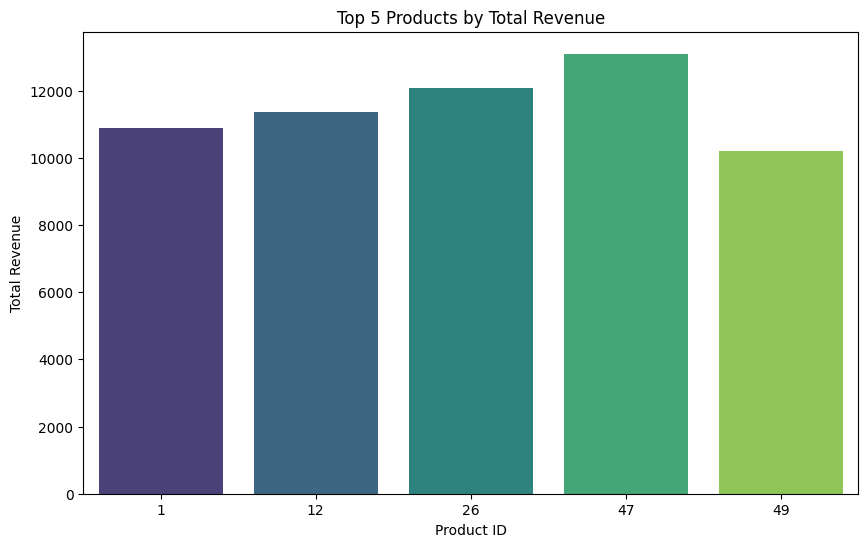

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Top 5 Products by Total Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='product_id', y='total_revenue', data=top_products, palette='viridis')
plt.title('Top 5 Products by Total Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.show()
